In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

x = data.loc[:, features].values

y = data.Species

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0)

In [9]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [10]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [11]:
score = clf.score(x_test, y_test)
score

0.8947368421052632

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



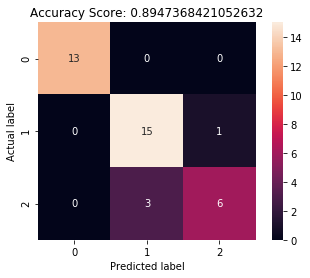

In [13]:
import seaborn as sns
matrix = metrics.confusion_matrix(y_test, clf.predict(x_test))

sns.heatmap(matrix, annot=True,square = True);

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {}'.format(score))
plt.tick_params(labelsize= 10)

In [14]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

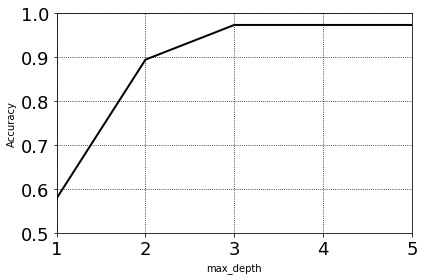

In [16]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1);

ax.plot(max_depth_range,accuracy,lw=2,color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,axis = 'both',zorder = 0,linestyle = ':',color = 'k')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
fig.tight_layout()

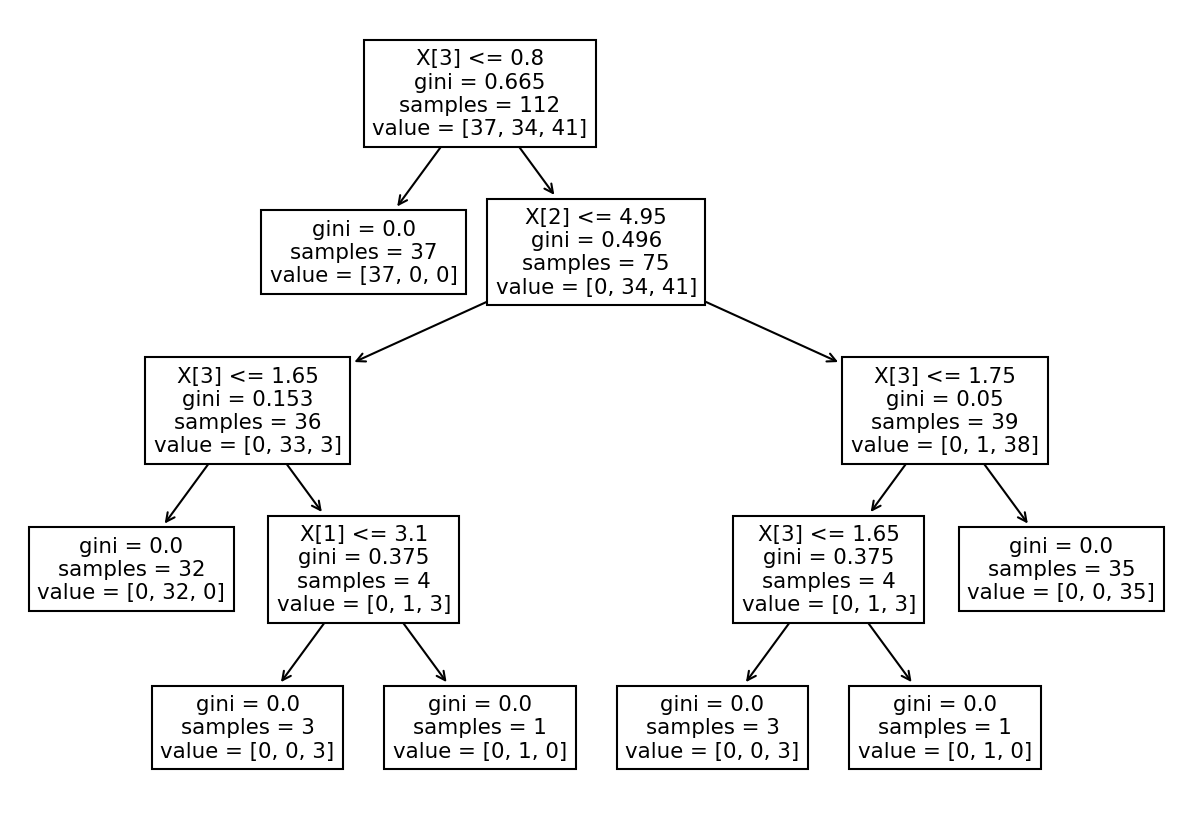

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), dpi = 150)
tree.plot_tree(clf);

In [19]:
# Putting the feature names and class names into variables
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
clas = ['setosa', 'versicolor', 'virginica']

[Text(651.0, 815.4, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(488.25, 634.2, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(813.75, 634.2, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(325.5, 453.0, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(162.75, 271.80000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(488.25, 271.80000000000007, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(325.5, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(651.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(1302.0, 453.0, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(1139.25, 27

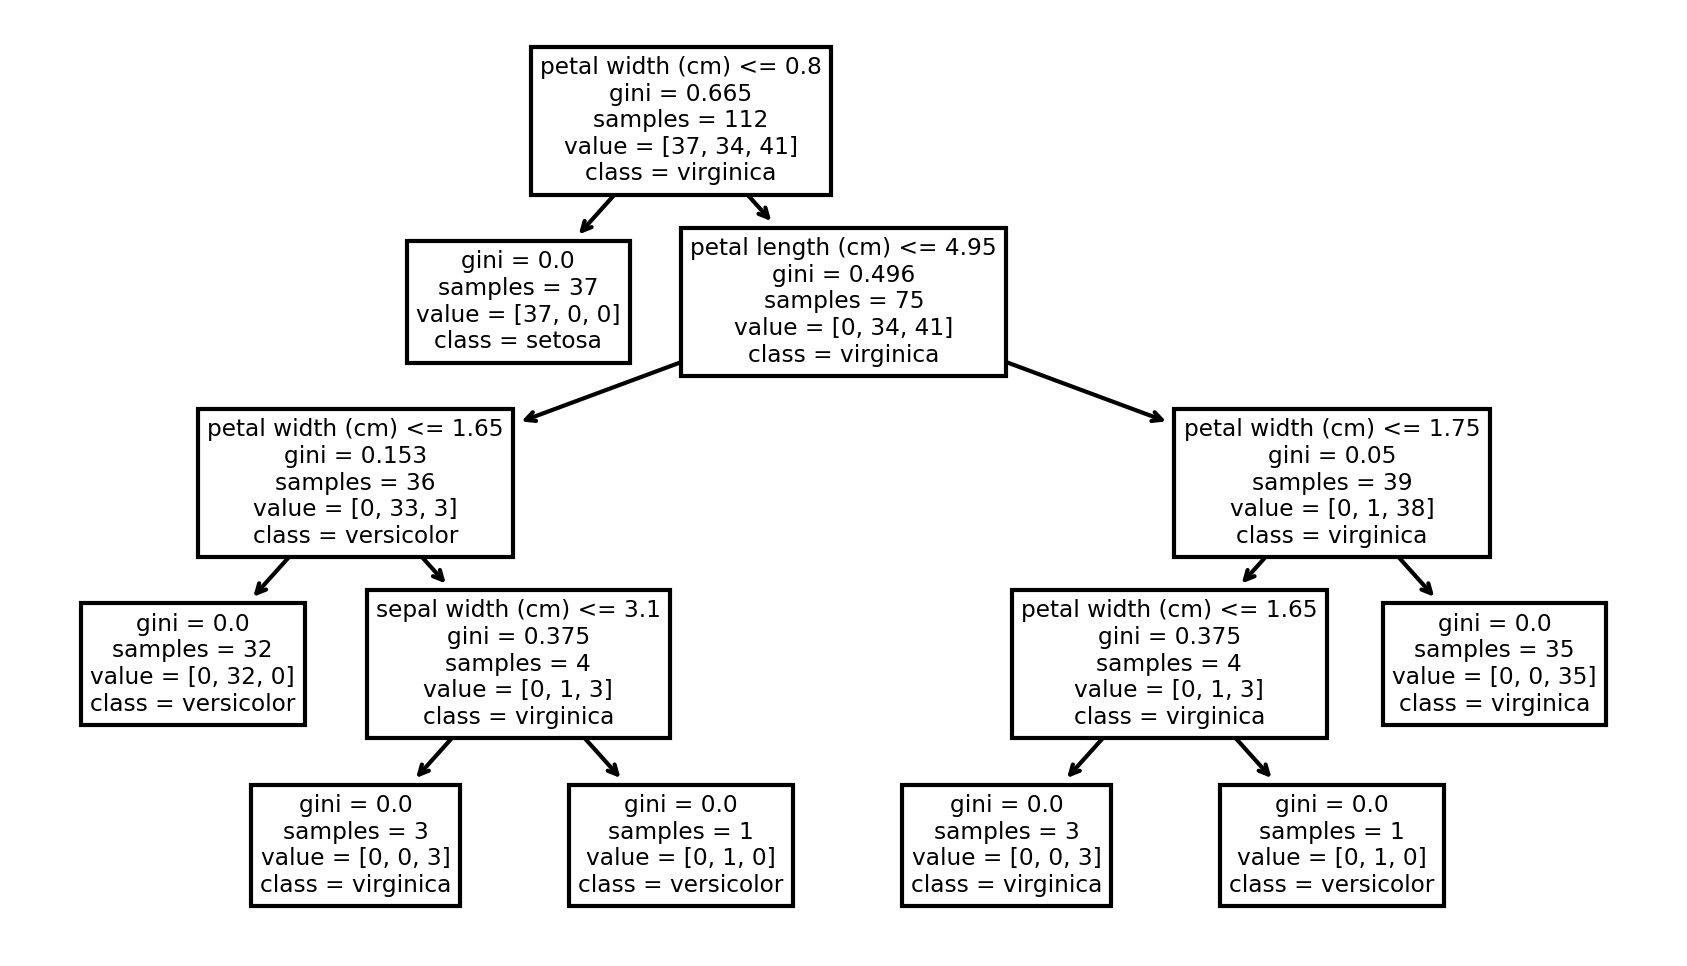

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=clas)
